# Basic Binary Classification Neural Network From Scratch

`Goal:` Build a NN that can perform binary classification, i.e predicts 0 or 1.

Binary classification is a machine learning task where data is categorized into two classes. `Logistic regression` is a common algorithm used to perform binary classification.

Examples:
- cat or dog (0=cat and 1=dog).
- cat or no-cat (0=no-cat and 1=cat).
- Survived.
- poison or edible

A **basic NN** is a NN that has no hidden layers, we simply compute:
$$z^{(i)} = W^T x^{(i)}+ b$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$
- Note: the $^{(i)}$ is for one sample.
1. We multiply the weights $W$ by the input features $x$ and add a bias $b$.
2. We compute an activation function $sigmoid$ to get the models output.
3. While a DNN (Deep Neural Network) can have many hidden layers.

**Note**: Training the model was taking to long with the mushroom dataset (~10+mins train time) when using Numpy which is locked to the CPU, instead I used torch on GPU (~5seconds train time). However I did use Numpy outside of that space like gathering the data.

**Vocab:**
- A Sample or an Example: A sample is one feature vector. For instance, if you have images of cats, one image is one sample. Similarly, if you have rows of mushrooms in a dataframe, one row is one sample.
- Label, y, or target: Is the part of the data that we want the model to predict on. Example mushroom dataset; the 'class' column has a 'p'=poison or 'e'=edible label.
- Feature, x: Is the part of the data that we will feed through the Neural network.



**Sections:**
1. [Mushroom Dataset](#mushroom-dataset)

2. [Build The Neural Network Algorithm](#build-the-neural-network-algorithm)
3. [Cat Or No-Cat](#cat-or-no-cat).
4. [PyTorch implement](#implement-functions-using-torch)

In [1]:
# Import necessary libraries.
import torch
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Get available GPU device.
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print(f"Using CUDA device: {torch.cuda.get_device_name(DEVICE)}")
elif torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
    print("Using MPS device (Apple Silicon GPU)")
else:
    DEVICE = torch.device("cpu")
    print("Using CPU device")

Using MPS device (Apple Silicon GPU)


## Mushroom Dataset

### Download The Mushroom Classification Dataset

⭐️ `Goal:` Have an NN model identity if a mushroom is poisonous or edible.

- From the dataset publisher:
    - mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?
    - This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

1. Download the Mushroom Classification Dataset (~61 KB) from [kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification/data) 
2. Rename the zip file to Mushroom_classification.zip
3. Move the zip file to ./datasets and extract.
```tree
datasets
├── mushrooms.csv
└── Mushroom_classification.zip
```

### Extract And Load The Dataset From The CSV
Load the dataset into a pandas dataframe

In [3]:
df = pd.read_csv('./datasets/mushrooms.csv')
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


**Description:** The dataframe has 23 columns, the 'class' column is the label and the rest are the features. Each row is a mushroom.

Get unique values for all columns:

In [4]:
unique_values_per_column = {}
for column in df.columns:
    unique_values_per_column[column] = df[column].unique()
print("Unique values in all columns:")
unique_values_per_column

Unique values in all columns:


{'class': array(['p', 'e'], dtype=object),
 'cap-shape': array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object),
 'cap-surface': array(['s', 'y', 'f', 'g'], dtype=object),
 'cap-color': array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object),
 'bruises': array(['t', 'f'], dtype=object),
 'odor': array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object),
 'gill-attachment': array(['f', 'a'], dtype=object),
 'gill-spacing': array(['c', 'w'], dtype=object),
 'gill-size': array(['n', 'b'], dtype=object),
 'gill-color': array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
       dtype=object),
 'stalk-shape': array(['e', 't'], dtype=object),
 'stalk-root': array(['e', 'c', 'b', 'r', '?'], dtype=object),
 'stalk-surface-above-ring': array(['s', 'f', 'k', 'y'], dtype=object),
 'stalk-surface-below-ring': array(['s', 'f', 'y', 'k'], dtype=object),
 'stalk-color-above-ring': array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object),
 'stalk-color-be

🚨 **Note** that the data value are letters -> e.g., ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] 

### Pre-Process the Dataset

We need to pre-process the dataset so that we can pass it through our Neural Network that we will build later on.

The 'class' column for each row has an `e`=edible or a `p`=poison, indicating whether that mushroom is poisonous or edible.
    - The classes will be represented as: edible=`0` and poison=`1`.

---

- We will split the dataframe into two dataframes (input and label):
    - `X = input`:
        - The input is what we will feed through our model.
        - It will contain all the data from df excluding the 'class' column.
    - `y = label`:
        - It will only contain the 'class' column.
- Then randomly split those two dataframes into four tensors using (80/20 split):
    - Tensors: X_train_df, X_test_df, y_train_df, y_test_df.
    - Fit OneHotEncoder() on only the x_train_df.

---
A NN can only see `numerical values` so we will need to convert the letters into a numerical representation by utilizing `one-hot encoding`.
- An example of one-hot encoding:

| Fruit    | Color   | Shape   |
| :------- | :------ | :------ |
| Apple    | Red     | Round   |
| Banana   | Yellow  | Curved  |
| Orange   | Orange  | Round   |
| Apple    | Green   | Round   |

The 'Fruit' column is the label.

| Fruit    | Color_Red | Color_Yellow | Color_Orange | Color_Green | Shape_Round | Shape_Curved |
| :------- | :-------- | :----------- | :----------- | :----------- | :---------- | :----------- |
| Apple    | 1         | 0            | 0            | 0           | 1           | 0            |
| Banana   | 0         | 1            | 0            | 0           | 0           | 1            |
| Orange   | 0         | 0            | 1            | 0           | 1           | 0            |
| Apple    | 0         | 0            | 0            | 1           | 1           | 0            |

In [5]:
class_names = ['edible', 'poisonous'] # Index 0 for 'e' (edible), Index 1 for 'p' (poisonous)

`1. Clean-up Data`

Columns/Features to remove:
- The column "veil-type" only has one value 'p', so we drop that column since it only has one value it doesn't provide any discriminative information.

Note: the column 'stalk-root' has '?' values which will be one-hot encoded. 'stalk-root' values -> ['e', 'c', 'b', 'r', '?'].

In [6]:
# Remove "veil-type" column
df.drop("veil-type", axis=1, inplace=True)

`2. Get Number of features`

In [7]:
total_mushroom_features = 0
for key in unique_values_per_column:
    if key == 'class' or key == "veil-type":
        # Get the features which is only the X columns that we will feed the model. the 'class' col is for the y and the 'veil-type' was removed
        continue
    total_mushroom_features += len(unique_values_per_column[key])
f"Total number of features: {total_mushroom_features}"

'Total number of features: 116'

Total number of `features` is 116.
- This means every sample/mushroom will have 116 columns. Why 116 and not 21 (after removing the 'class' and 'veil-type' columns), when we one-hot encode more columns will be added.

`3. Split the features and target then divide into train and test sets.`

In [8]:
# Separate features (X) and target (y)
X_df = df.drop("class", axis=1)

# Create the label and one-hot encode the class column to be 0 or 1.
y_df = df["class"].map(
    {
        "e": 0,
        "p": 1,
    }
)
y_df.head(3)

0    1
1    0
2    0
Name: class, dtype: int64

In [9]:
X_df.head(3)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m


Split into train and test sets. We do a 80/20 split, the train will contain 80% and the test will contain 20%.

🔔 **Non-random Data Distribution**: The mushroom dataset is not a time-series dataset, meaning the order of its rows is arbitrary and not indicative of any temporal relationships. if you split it sequentially, you risk creating training and testing sets that do not accurately represent the overall distribution of categories within your data, e.g., don't take the first 80% for the train set and the last 20% for the test set, instead randomly split the data.

In [10]:
from sklearn.model_selection import train_test_split
# Split into 4 tensors.
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42 
)

print(f"Train set has {len(X_train_df)} samples, test set has {len(X_test_df)} samples.")

Train set has 6499 samples, test set has 1625 samples.


`4. One-Hot Encode The Data`

In [11]:
categorical_cols = X_train_df.select_dtypes(include='object').columns.tolist()
print(f"\nCategorical columns to encode -> count: {len(categorical_cols)} -> {categorical_cols}")


Categorical columns to encode -> count: 21 -> ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [12]:
# Initialize and fit the OneHotEncoder on the TRAINING DATA ONLY
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for dense numpy arrays
encoder.fit(X_train_df[categorical_cols])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [13]:
# Encode both training and test data
#   For training data
X_train = encoder.transform(X_train_df[categorical_cols])
X_test = encoder.transform(X_test_df[categorical_cols])

# For the labeled data that has already been encoded simply transfer it to a numpy array.
y_train = y_train_df.values
y_test = y_test_df.values

In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6499, 116))

In [15]:
X_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(1625, 116))

`Show example one-hot encoding for the first mushroom/row`

In [16]:
first_row_sample = X_train[0]
first_row_sample

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.])

In [17]:
# Get the feature names in the correct order
encoded_feature_names = encoder.get_feature_names_out()
# Find the names of the features where the value is 1
active_features_for_sample = encoded_feature_names[first_row_sample == 1.0]

print("This mushroom sample has the following characteristics:")
for feature_name in active_features_for_sample:
    print(f"- {feature_name}")
print("This mushroom in the dataframe:")
X_train_df.head(1)

This mushroom sample has the following characteristics:
- cap-shape_k
- cap-surface_s
- cap-color_e
- bruises_f
- odor_s
- gill-attachment_f
- gill-spacing_c
- gill-size_n
- gill-color_b
- stalk-shape_t
- stalk-root_?
- stalk-surface-above-ring_s
- stalk-surface-below-ring_k
- stalk-color-above-ring_p
- stalk-color-below-ring_w
- veil-color_w
- ring-number_o
- ring-type_e
- spore-print-color_w
- population_v
- habitat_d
This mushroom in the dataframe:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,k,s,e,f,s,f,c,n,b,t,...,s,k,p,w,w,o,e,w,v,d


`Reshape tensors:` so that we can pass them through our model.

In [18]:
y_test, y_test.shape, y_train, y_train.shape

(array([0, 1, 1, ..., 1, 1, 1], shape=(1625,)),
 (1625,),
 array([1, 1, 1, ..., 0, 1, 0], shape=(6499,)),
 (6499,))

In [19]:
# Reshape labels from (N, 1) -> to be of shape (1, N) where N is the number of samples/mushrooms in that set.
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

In [20]:
y_test, y_test.shape, y_train, y_train.shape

(array([[0, 1, 1, ..., 1, 1, 1]], shape=(1, 1625)),
 (1, 1625),
 array([[1, 1, 1, ..., 0, 1, 0]], shape=(1, 6499)),
 (1, 6499))

In [21]:
# Transpose the X so we get a shape of (116 features, N)
X_train, X_test = X_train.T, X_test.T
X_train.shape, X_test.shape

((116, 6499), (116, 1625))

## Build The Neural Network Algorithm

`Logistic regression Algorithm:`

For one example $x^{(i)}$ i.e one sample/mushroom:

**Forward Propagation:**
* In forward prop we show the model our train input (X) data and it makes predictions on it. At first its predictions will be random and not good however through backpropagation we will make the predictions more accurate.

$$z^{(i)} = W^T x^{(i)}+ b$$

- $W^T$ is the weights.
    - The $^T$ over $W$ means to transpose the weights.
- $b$ is the bias.
---
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$

- $\hat{y}^{(i)}$ or $a^{(i)}$ = Different notations meaning the model's output prediction.
- $sigmoid()$ is the activation function. *In this case the sigmoid activation function.*
---
**Backward Propagation:**
- ⭐️ Logistic regression uses *Binary cross-entropy loss function*.
* In backward prop we will adjust the models learned parameters (w, and b) so that its predictions better match the target/label data.

$$ \mathcal{L}(a^{(i)}, y^{(i)}) = -y^{(i)} log(a^{(i)}) - (1 - y^{(i)}) log(1 - a^{(i)}) $$
- $\mathcal{L}$ indicates the loss function.
- A loss function evaluates the error on a single training example/sample.

---
- The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m}  \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)}) $$
- A cost function aggregates the losses over the entire training dataset

**Implement** sigmoid activation function:
$$ sigmoid(z) = \frac{1}{1 + e^{-z} }$$ 

In [22]:
def sigmoid(z):
    """
    Compute the sigmoid activate function.

    Arg:
        z -- a scalar or tensor of any size.
    """
    s = 1 / (1 + torch.exp(-z))
    return s

In [23]:
print(f"Test sigmoid([0, 9]) = {sigmoid(torch.tensor([0,9]))}")

Test sigmoid([0, 9]) = tensor([0.5000, 0.9999])


**Implement** parameter initialization where we initialize w *(weights)* as a vector of zeros.

In [24]:
def initialize_with_zeros(dim):
    """
        NOTE: Initializing all weights in a neural network to zero is generally not a good practice because it prevents the network from learning effectively. 

        This function creates a vector of zeros of shape (dim, 1) for w (weights) and initializes b (bias) to 0.
        
        Arg:
            dim -- size of the w vector we want (or number of parameters in this case)
        
        Returns:
            w -- initialized tensor of shape (dim, 1) with all zeros.
            b -- initialized scalar tensor (corresponds to the bias) with a zero.
    """
    w = torch.zeros((dim, 1), device=DEVICE)
    b = torch.tensor(0.0, device=DEVICE)
    return w, b

In [25]:
initialize_with_zeros(2)

(tensor([[0.],
         [0.]], device='mps:0'),
 tensor(0., device='mps:0'))

#### Forward And Backward Propagation

**Forward Propagation:** Feed the input X to the model.
- Compute $A$:
$$ A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)} )$$


**Backward propagation:** adjust the learned parameters w, and b.
- Calculate the cost function $J$: 
$$ J = -\frac{1}{m} \sum_{i=1}^m  (y^{(i)} log(a^{(i)}) + (1 - y^{(i)}) log(1 - a^{(i)}))$$
---
- Get the gradient of the loss with respect to w.
$$ \frac{\partial J}{\partial w} = \frac{1}{m} X (A-Y)^T$$
- $A$ is the models prediction.
- $Y$ is the true target/label.
- $m$ is the number of samples.

---
- Get the gradient of the loss with respect to b.
$$ \frac{\partial J}{\partial b} = \frac{1}{m}  \sum_{i=1}^m (a^{(i)} - y^{(i)})$$


In [26]:
def propagate(w, b, X, Y):
    """
    Implement forward and back propagation.

    Arg:
        w -- weights, a numpy array of size (features, 1). Where features is the vector that one sample has, e.g., one RGB image has a vector of 24 x 24 x 3 = 1,728 features. For the mushroom dataset one sample/mushroom has 21 columns/features.
        b -- bias, a scalar
        X -- data of size (features, N) where N is the number of samples.
        Y -- true "label" vector (containing 0 or 1) of size (1, N) note the one-hot encoding can only be len([0, 1]).

    Return:
        grads -- dictionary containing the gradients of the cost with respect to weight w and bias b.
            (dw -- gradient of the loss with respect to w, thus the same shape as w)
            (db -- gradient of the loss with respect to b, thus the same shape as b)
        cost -- negative log-likelihood cost for logistic regression

    """
    # Get the number of samples
    m = X.shape[1]

    # --- 1: Forward propagate
    A = sigmoid(w.T @ X + b)  # the @ operator for matrix multiplication or dot-product, the .T is to transpose that tensor.
    # A is the model's prediction.

    # --- 2: Backward propagate
    #   Binary Cross-Entropy Loss 
    cost = -1 / m * torch.sum(Y * torch.log(A) + (1 - Y) * torch.log(1 - A))
    # Get the gradient of the loss with respect to w.
    dw = 1 / m * X @ (A - Y).T
    # Get the gradient of the loss with respect to b.
    db = 1 / m * torch.sum(A - Y)

    grads = {"dw": dw, "db": db}
    return grads, cost

#### Optimize:

The goal is to learn $w$ and $b$ by minimizing the cost function $J$.
- We use the `Stochastic Gradient Descent (SGD)` optimizer.
- For parameter $\theta$ the update rule is $\theta = \theta -\alpha  d\theta$, where $\alpha$ is the learning rate.

In [27]:
import copy

def optimize(w, b, X, Y, Epoch=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm.

    Arg:
        w -- weights, a numpy array of size (features, 1), where feature is the vector of one sample.
        b -- bias, a scalar
        X -- data of shape (feature, N)
        Y -- true "label" vector (containing 0 or 1) of size (1, N)

        Epoch  -- hyperparameter. The number of times that the model sees the train dataset, e.g., Epoch=5 means the models loops through the train dataset 5 times.
        learning_rate -- a hyperparameter that controls the step size during the optimization process, determining how much the model's parameters are adjusted in response to the estimated error at each iteration.
        print_cost -- True to print the loss every 100 steps

    Returns:
        params -- dictionary containing the weights w and bias b
        grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
        costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(Epoch):
        # --- Forward & Backward propagation.
        #    cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads.
        dw = grads["dw"]
        db = grads["db"]
        
        # --- Gradient descent:
        #   Optimizer is Stochastic Gradient Descent (SGD).
        #   Update the weight and bias to make the model predict closer to the true target.
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            
            if print_cost and i % 100 == 0:
                print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

**Predict:** optimize() will output the learned $w$ and $b$. We are able to use this $w$ and $b$ to make prediction on data that the model hasn't seen such as the test set.
- Calculate $\hat{Y}$:
$$\hat{Y} = A = \sigma(w^T X + b)$$

In [28]:
def predict(w, b, X):
    '''
    Predict whether a (mushroom is poisonous or not) or (a image contains a cat or not) using the learned logistic regression parameters (w, b).
    
    Arg:
        w -- weights, a numpy array of size (feature, 1), where feature is the vector of one sample.
        b -- bias, a scalar
        X -- data of size (feature, number of examples)
    
    returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = torch.zeros((1, m), device=DEVICE)
    w = w.reshape(X.shape[0], 1)
    
    # --- Predict
    A = sigmoid(w.T @ X + b)

    # Adjust the values of Y_prediction to match the predicted values.
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    return Y_prediction  

#### Model: Put everything together.

In [29]:
def model(X_train, Y_train, X_test, Y_test, Epoch=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the functions implemented above.
    
    Arg:
        X_train -- training set represented by a tensor of shape (features, train_samples). Where features is the vector that one sample has, e.g., one RGB image has a vector of 24(pixel) x 24(pixel) x 3(channels) = 1,728 features. For the mushroom dataset one sample/mushroom has 21 columns/features.

        Y_train -- training labels represented by a tensor of shape (1, train_samples)
        
        X_test -- test set represented by a tensor of shape (features, test_samples)
        Y_test -- test labels represented by a tensor of shape (1, test_samples)

        Epoch  -- hyperparameter. The number of times that the model sees the train dataset, e.g., Epoch=5 means the models loops through the train dataset 5 times.
        learning_rate -- a hyperparameter that controls the step size during the optimization process, determining how much the model's parameters are adjusted in response to the estimated error at each iteration.
        print_cost -- Set to true to print the cost every 100 iterations
    
    returns:
        d -- dictionary containing information about the model
    """

    # --- Move data to torch from Numpy to utilize GPU if available.
    # train set
    X_train = torch.from_numpy(X_train).float().to(DEVICE) # I added .float() because MPS framework doesn't support float64. So used float32 instead.
    Y_train = torch.from_numpy(Y_train).float().to(DEVICE) 

    # test set
    X_test = torch.from_numpy(X_test).float().to(DEVICE) 
    Y_test = torch.from_numpy(Y_test).float().to(DEVICE)

    # Initialize parameters w and b with zeros.
    w, b = initialize_with_zeros(X_train.shape[0])

    # --- 1:  Forward & Backward propagate
    params, grads, costs = optimize(w, b, X_train, Y_train, Epoch, learning_rate, print_cost)
    
    # Retrieve the learning parameters w and b from dictionary "params"
    w = params["w"]
    b = params["b"]
    
    # --- 2: predict test/train set examples
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    # Print train/test Errors
    if print_cost:
        print("\nPredict:")
        print("train accuracy: {} %".format(100 - torch.mean(torch.abs(Y_prediction_train - Y_train)) * 100))

        print("test accuracy: {} %".format(100 - torch.mean(torch.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "Epoch": Epoch}
    
    return d

**Instantiate the model**

In [30]:
mushroom_logistic_regression_model = model(X_train, y_train, X_test, y_test, Epoch=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.561311
Cost after iteration 200: 0.475369
Cost after iteration 300: 0.416377
Cost after iteration 400: 0.373865
Cost after iteration 500: 0.341850
Cost after iteration 600: 0.316811
Cost after iteration 700: 0.296600
Cost after iteration 800: 0.279852
Cost after iteration 900: 0.265674
Cost after iteration 1000: 0.253458
Cost after iteration 1100: 0.242776
Cost after iteration 1200: 0.233323
Cost after iteration 1300: 0.224871
Cost after iteration 1400: 0.217251
Cost after iteration 1500: 0.210331
Cost after iteration 1600: 0.204007
Cost after iteration 1700: 0.198198
Cost after iteration 1800: 0.192835
Cost after iteration 1900: 0.187865

Predict:
train accuracy: 95.18387603759766 %
test accuracy: 94.83077239990234 %


`Check` prediction

In [31]:
index = 152
target_value = y_test[0, index]
predicted_value = int(mushroom_logistic_regression_model['Y_prediction_test'][0, index])
print(f"The mushroom @ index: {index}\n   the true target was {target_value}={class_names[target_value]} \n   and the model predicted {predicted_value}={class_names[predicted_value]}")
print(f"Value from the dataframe: {y_test_df.iloc[index]}")

The mushroom @ index: 152
   the true target was 1=poisonous 
   and the model predicted 1=poisonous
Value from the dataframe: 1


`Plot` the learning rate.

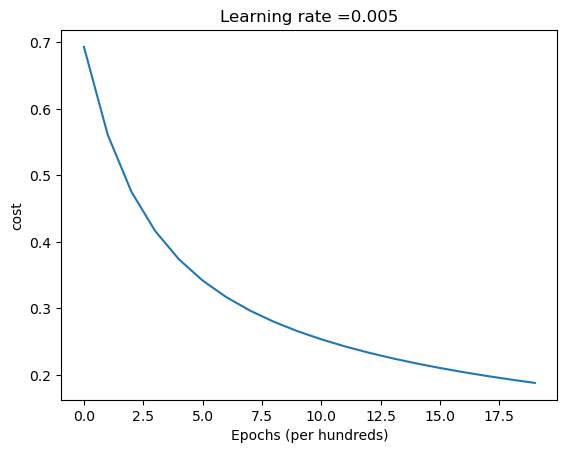

In [32]:
# Plot learning curve (with costs)
costs = [t.cpu().item() for t in mushroom_logistic_regression_model['costs']]
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('Epochs (per hundreds)')
plt.title("Learning rate =" + str(mushroom_logistic_regression_model["learning_rate"]))
plt.show()

## Cat Or No-Cat

⭐️ `Goal:` Have a basic NN identify if a cat is present in an image.
- $0$ mean theres no cat and $1$ meaning theres a cat.

### Extract And Load the dataset from .h5 files

In [33]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import torch

In [34]:
def load_dataset():
    train_dataset = h5py.File("./datasets/train_catvnoncat.h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    test_dataset = h5py.File('./datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
    
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
    

In [35]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [36]:
train_set_x_orig.shape, test_set_x_orig.shape

((209, 64, 64, 3), (50, 64, 64, 3))

**Description:** 
- The dataset contains RGB images each 64x64 pixels with 3 color channels
- An image is $64x64x3 = 12,288$ pixel values = each of these 12,288 pixel values is a `feature`.
- The train set has 209 samples and the test set has 50.
- The labels are not one-hot encoded in the traditional sense (where cat might be [0, 1] and no-cat is [1, 0]). They are simply single integers (0 or 1)

In [37]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

`Show one image`

y = [1], it's a 'cat' picture.


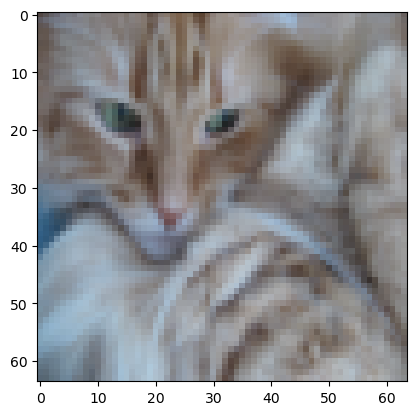

In [38]:
# You can see index 2 in train_set_y above, remember indexing starts at zero.
index = 2 # The index in the train_set_y represents the labeled data for one image. 
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

`Reshape tensors:` so that we can pass them through our model.

In [39]:
# m = number of images
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]
print(f'Amount of training images: {m_train} | Amount of test images: {m_test} \n| Width & Height pixel count: {num_px}')

Amount of training images: 209 | Amount of test images: 50 
| Width & Height pixel count: 64


In [40]:
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T
train_set_x_flatten.shape

(12288, 209)

### Normalize
* Normalize the image pixel values to be between 0-1, this will greatly improve how fast our model trains and computes calculations.

In [41]:
train_set_x_flatten

array([[ 17, 196,  82, ..., 143,  22,   8],
       [ 31, 192,  71, ..., 155,  24,  28],
       [ 56, 190,  68, ..., 165,  23,  53],
       ...,
       [  0,  82, 138, ...,  85,   4,   0],
       [  0,  80, 141, ..., 107,   5,   0],
       [  0,  81, 142, ..., 149,   0,   0]],
      shape=(12288, 209), dtype=uint8)

In [42]:
train_set_x = train_set_x_flatten / 255.0 # Normalize
test_set_x = test_set_x_flatten / 255.0 # Normalize

In [43]:
train_set_x

array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
        0.03137255],
       [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
        0.10980392],
       [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
        0.20784314],
       ...,
       [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
        0.        ],
       [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
        0.        ],
       [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
        0.        ]], shape=(12288, 209))

### Feed To The model

In [44]:
cat_logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, Epoch=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872

Predict:
train accuracy: 99.04306030273438 %
test accuracy: 70.0 %


y = 1, model predicted that it is a "cat" picture.


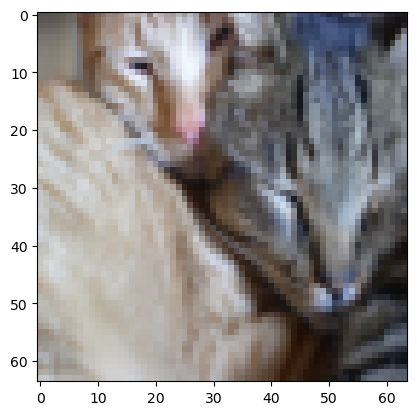

In [45]:
index = 37
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", model predicted that it is a \"" + classes[int(cat_logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

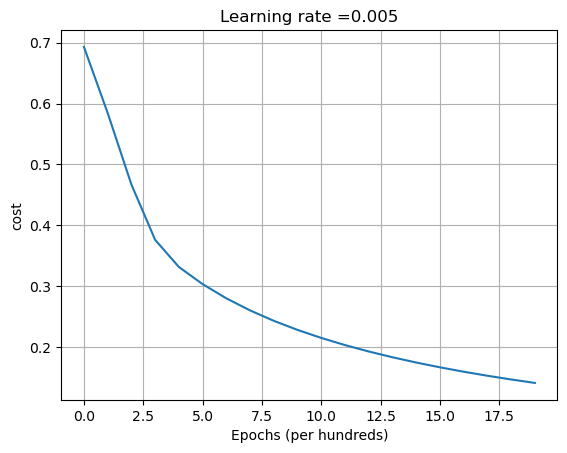

In [46]:
# Plot learning curve (with costs)
costs = torch.squeeze(torch.tensor(cat_logistic_regression_model['costs']))
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('Epochs (per hundreds)')
plt.title("Learning rate =" + str(cat_logistic_regression_model["learning_rate"]))
plt.grid(True)
plt.show()

#### See what learning rate value makes the model train better 

In [47]:
learning_rates = [0.01, 0.001, 0.0001, 0.005]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, Epoch=2000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------

Training a model with learning rate: 0.005

-------------------------------------------------------



`Plot` to see how the different learning rates affect how well the model trained.

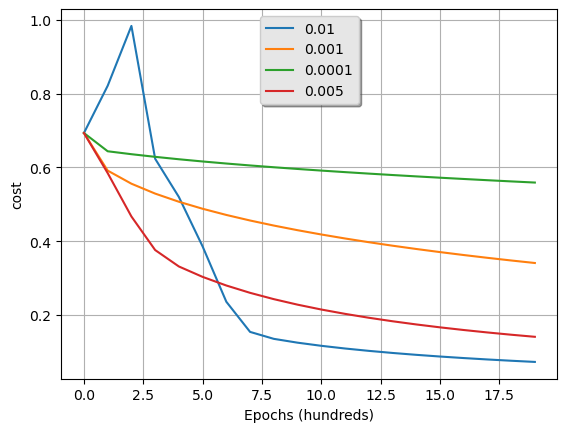

In [48]:
for lr in learning_rates:
    move_to_cpu = [t.cpu().item() for t in models[str(lr)]["costs"]]

    plt.plot(np.squeeze( move_to_cpu), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('Epochs (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.grid(True)
plt.show()

`Extrapolation:` A learning rate value of $0.01$ has the best overall cost score.

## Implement Functions Using torch 
- Show how easy it is to implement all the functions of [Build The Neural Network Algorithm](#Build_NN) with Pytorch.
- Run the mushroom dataset section.

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [50]:
# --- Device Configuration (from your original script) ---
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print(f"Using CUDA device: {torch.cuda.get_device_name(DEVICE)}")
elif torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
    print("Using MPS device (Apple Silicon GPU)")
else:
    DEVICE = torch.device("cpu")
    print("Using CPU device")

Using MPS device (Apple Silicon GPU)


In [51]:
X, y = X_train, y_train
X.shape, y.shape

((116, 6499), (1, 6499))

In [52]:
# Convert from Numpy arrays to torch tensors and move to GPU if available.
X = torch.tensor(X.T, dtype=torch.float32).to(DEVICE)
y = torch.tensor(y.T, dtype=torch.float32).to(DEVICE)

In [53]:
# DataLoader
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=256, shuffle=True)

In [54]:
total_mushroom_features

116

In [55]:
# Define the Neural Network.
torch_model = nn.Sequential(
    nn.Linear(total_mushroom_features, 1),               # input → output, no hidden layer
    # nn.Sigmoid() removed because BCEWithLogitsLoss() does Sigmoid internally. Squash output to [0,1] for binary classification
).to(DEVICE) # Move the model to the selected device.

In [56]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss() # Combines binary cross-entropy and sigmoid activation functions.
optimizer = optim.SGD(torch_model.parameters(), lr=0.01)

Training takes a little more time (~30s) than my scratch implantation.

In [57]:
# --- Training loop ---
epochs = 150
loss_history = []

for epoch in range(1, epochs+1):
    total_loss = 0.0
    for batch_X, batch_y in loader:
        # --- Forward propagate
        logits = torch_model(batch_X)                  # raw scores

        # --- Backward propagate
        loss = criterion(logits, batch_y)        # loss using BCEWithLogitsLoss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    loss_history.append(total_loss)
    if epoch % 50 == 0: # only print every 50th epoch.
        avg_loss = total_loss / len(loader)
        print(f"Epoch: [{epoch}/{epochs}], Average Loss: {avg_loss:.4f}")


Epoch: [50/150], Average Loss: 0.1611
Epoch: [100/150], Average Loss: 0.1131
Epoch: [150/150], Average Loss: 0.0917


`Plot` the loss.

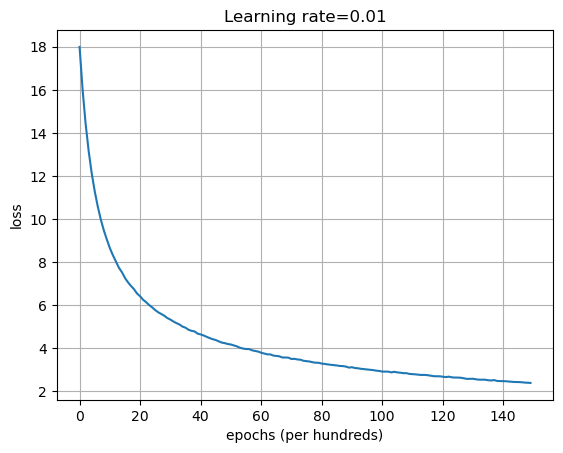

In [58]:
# Plot learning curve (with costs)
plt.plot(loss_history)
plt.ylabel('loss')
plt.xlabel('epochs (per hundreds)')
plt.title("Learning rate=0.01")
plt.grid(True)
plt.show()